# Importing all the required packages for the project.

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
from copy import deepcopy
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Downloading the latest updated dataset from the source.

In [2]:
# Function definition to retrieve the dataset:
def checkLatestVersion():
    if(os.path.exists("dly532.csv")):
        os.remove("dly532.csv")
        print("Deleted previous CSV file.")
        print("Downloading latest CSV file.")
        os.system("wget https://cli.fusio.net/cli/climate_data/webdata/dly532.csv")
        print("Downloaded dataset.")
    else:
        print("Downloading dataset.")
        os.system("wget https://cli.fusio.net/cli/climate_data/webdata/dly532.csv")
        print("Downloaded dataset.")
    return None

In [3]:
# Function call defined.
checkLatestVersion()

Deleted previous CSV file.
Downloaded dataset.


In [4]:
# Updating the CSV file with newly downloaded dataset.
with open("dly532.csv", "r") as reading:
    data = reading.read().splitlines(True)
reading.close()
os.remove("dly532.csv")
with open("dly532.csv", "w") as writing:
    writing.writelines(data[26:])
writing.close()

# Reading the raw dataset

Adding Column names to the dataset and assigning it to a dataframe named read_data.

In [5]:
names = ["DATE", "INDICATOR0","MAX_AIR_TEMP",
           "INDICATOR1","MIN_AIR_TEMP","I_GRASS_MIN_TEMP",
           "GRASS_MIN_TEMP","INDICATOR2","RAIN_MM",
           "MEAN_CBL_PRESSURE","MEAN_WINDSPEED_KNOT","INDICATOR3",
           "HIGHEST_10MIN_WINDSPEED","INDICATOR4","WIND_DIR_DEGREE",
           "INDICATOR5","HIGHEST_GUST","SUN_DURATION","DOS",
           "GLOBAL_RADIATION","SOIL_TEMP","POTENTIAL_EVAPOTRANSPIRATION",
           "EVAPORATION","SMD_WELL_DRAINED","SMD_MODERATELY_DRAINED","SMD_POORLY_DRAINED"]
read_data = pd.read_csv("dly532.csv", names = names)
read_data

,DATE,INDICATOR0,MAX_AIR_TEMP,INDICATOR1,MIN_AIR_TEMP,I_GRASS_MIN_TEMP,GRASS_MIN_TEMP,INDICATOR2,RAIN_MM,MEAN_CBL_PRESSURE,...,HIGHEST_GUST,SUN_DURATION,DOS,GLOBAL_RADIATION,SOIL_TEMP,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED
0,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,0,7.5,0,1.3,0,1.1,3,0.0,1011.1,...,14,0.0,0,203,5.375,0.2,0.3,0.4,0.4,-8.6
28820,27-nov-2020,0,7.9,1,-1.2,1,-5.5,0,0.2,1008.2,...,12,4.7,0,345,4.975,0.1,0.2,0.3,0.3,-8.3
28821,28-nov-2020,0,10.2,0,0.6,1,-3.7,3,0.0,1008.3,...,15,0.6,0,222,4.800,0.3,0.4,0.6,0.6,-7.6
28822,29-nov-2020,0,10.8,0,1.9,1,-0.8,3,0.0,1015.1,...,14,1.9,0,198,6.650,0.2,0.3,0.8,0.8,-7.0


# Pre-processing the data.

Removing empty values, the old rows(till 28-oct-1979)and irrelevant data. 

In [6]:
read_data = pd.read_csv("dly532.csv", names = names)
read_data = read_data.replace(r'^\s*$', np.nan, regex=True)
read_data = read_data[read_data["SMD_POORLY_DRAINED"].notna()]
read_data

,DATE,INDICATOR0,MAX_AIR_TEMP,INDICATOR1,MIN_AIR_TEMP,I_GRASS_MIN_TEMP,GRASS_MIN_TEMP,INDICATOR2,RAIN_MM,MEAN_CBL_PRESSURE,...,HIGHEST_GUST,SUN_DURATION,DOS,GLOBAL_RADIATION,SOIL_TEMP,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED
13814,28-oct-1979,0,12.0,0,4.5,1,-1.9,0,0.9,997.9,...,22,4.2,0,573,9.350,0.7,0.9,0.0,-0.2,-0.2
13815,29-oct-1979,0,11.0,0,4.0,0,2.7,0,0.7,998.8,...,17,0.4,0,417,8.625,0.6,0.8,0.0,-0.1,-0.3
13816,30-oct-1979,0,15.7,0,8.8,0,7.4,0,4.8,990.8,...,36,0.6,0,247,10.550,0.8,1.0,0.0,-4.0,-4.4
13817,31-oct-1979,0,12.6,0,7.1,0,5.3,0,0.5,990.0,...,37,6.7,0,577,9.875,1.0,1.2,0.5,0.5,-3.7
13818,01-nov-1979,0,11.4,0,5.5,0,4.0,2,0.0,1001.6,...,27,7.0,0,585,8.175,1.2,1.5,1.6,1.6,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,0,7.5,0,1.3,0,1.1,3,0.0,1011.1,...,14,0.0,0,203,5.375,0.2,0.3,0.4,0.4,-8.6
28820,27-nov-2020,0,7.9,1,-1.2,1,-5.5,0,0.2,1008.2,...,12,4.7,0,345,4.975,0.1,0.2,0.3,0.3,-8.3
28821,28-nov-2020,0,10.2,0,0.6,1,-3.7,3,0.0,1008.3,...,15,0.6,0,222,4.800,0.3,0.4,0.6,0.6,-7.6
28822,29-nov-2020,0,10.8,0,1.9,1,-0.8,3,0.0,1015.1,...,14,1.9,0,198,6.650,0.2,0.3,0.8,0.8,-7.0


Checking the data types of each column.

In [7]:
read_data.dtypes

DATE                             object
INDICATOR0                        int64
MAX_AIR_TEMP                    float64
INDICATOR1                        int64
MIN_AIR_TEMP                    float64
I_GRASS_MIN_TEMP                  int64
GRASS_MIN_TEMP                   object
INDICATOR2                        int64
RAIN_MM                         float64
MEAN_CBL_PRESSURE               float64
MEAN_WINDSPEED_KNOT             float64
INDICATOR3                        int64
HIGHEST_10MIN_WINDSPEED          object
INDICATOR4                        int64
WIND_DIR_DEGREE                  object
INDICATOR5                        int64
HIGHEST_GUST                     object
SUN_DURATION                    float64
DOS                              object
GLOBAL_RADIATION                 object
SOIL_TEMP                        object
POTENTIAL_EVAPOTRANSPIRATION    float64
EVAPORATION                      object
SMD_WELL_DRAINED                 object
SMD_MODERATELY_DRAINED           object


### Converting object to float data types

Except Date column all other columns containing object type are converted into float.

In [8]:
read_data['HIGHEST_10MIN_WINDSPEED'] = read_data['HIGHEST_10MIN_WINDSPEED'].astype(float)
read_data['WIND_DIR_DEGREE'] = read_data['WIND_DIR_DEGREE'].astype(float)
read_data['HIGHEST_GUST'] = read_data['HIGHEST_GUST'].astype(float)
read_data['GRASS_MIN_TEMP'] = read_data['GRASS_MIN_TEMP'].astype(float)
read_data['EVAPORATION'] = read_data['EVAPORATION'].astype(float)
read_data['DOS'] = read_data['DOS'].astype(float)
read_data['GLOBAL_RADIATION'] = read_data['GLOBAL_RADIATION'].astype(float)
read_data['SOIL_TEMP'] = read_data['SOIL_TEMP'].astype(float)
read_data['SMD_WELL_DRAINED'] = read_data['SMD_WELL_DRAINED'].astype(float)
read_data['SMD_MODERATELY_DRAINED'] = read_data['SMD_MODERATELY_DRAINED'].astype(float)
read_data['SMD_POORLY_DRAINED'] = read_data['SMD_POORLY_DRAINED'].astype(float)
print(read_data.dtypes)

DATE                             object
INDICATOR0                        int64
MAX_AIR_TEMP                    float64
INDICATOR1                        int64
MIN_AIR_TEMP                    float64
I_GRASS_MIN_TEMP                  int64
GRASS_MIN_TEMP                  float64
INDICATOR2                        int64
RAIN_MM                         float64
MEAN_CBL_PRESSURE               float64
MEAN_WINDSPEED_KNOT             float64
INDICATOR3                        int64
HIGHEST_10MIN_WINDSPEED         float64
INDICATOR4                        int64
WIND_DIR_DEGREE                 float64
INDICATOR5                        int64
HIGHEST_GUST                    float64
SUN_DURATION                    float64
DOS                             float64
GLOBAL_RADIATION                float64
SOIL_TEMP                       float64
POTENTIAL_EVAPOTRANSPIRATION    float64
EVAPORATION                     float64
SMD_WELL_DRAINED                float64
SMD_MODERATELY_DRAINED          float64


# Removing Columns which are not relevant.

The following columns are removed because these columns are poorly correlated to the target column [RAIN_MM]

In [9]:
read_data = read_data.drop(columns = ["I_GRASS_MIN_TEMP","GRASS_MIN_TEMP",
                                      "INDICATOR2","GLOBAL_RADIATION","DOS",
                                      "SOIL_TEMP","INDICATOR0","INDICATOR1",
                                      "INDICATOR2","INDICATOR3","INDICATOR4",
                                      "INDICATOR5","MEAN_CBL_PRESSURE",
                                      "SMD_WELL_DRAINED","SMD_MODERATELY_DRAINED",
                                      "SMD_POORLY_DRAINED"])
read_data

,DATE,MAX_AIR_TEMP,MIN_AIR_TEMP,RAIN_MM,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
13814,28-oct-1979,12.0,4.5,0.9,8.8,16.0,280.0,22.0,4.2,0.7,0.9
13815,29-oct-1979,11.0,4.0,0.7,8.2,12.0,240.0,17.0,0.4,0.6,0.8
13816,30-oct-1979,15.7,8.8,4.8,14.3,24.0,210.0,36.0,0.6,0.8,1.0
13817,31-oct-1979,12.6,7.1,0.5,13.5,24.0,250.0,37.0,6.7,1.0,1.2
13818,01-nov-1979,11.4,5.5,0.0,12.5,19.0,240.0,27.0,7.0,1.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,7.5,1.3,0.0,5.5,10.0,270.0,14.0,0.0,0.2,0.3
28820,27-nov-2020,7.9,-1.2,0.2,3.0,7.0,140.0,12.0,4.7,0.1,0.2
28821,28-nov-2020,10.2,0.6,0.0,6.3,11.0,80.0,15.0,0.6,0.3,0.4
28822,29-nov-2020,10.8,1.9,0.0,4.4,10.0,280.0,14.0,1.9,0.2,0.3


Filling Null values in the dataset with float 0 and checking for columns containing any Null values in it.

In [10]:
read_data = read_data.fillna(read_data.mean())
read_data.isnull().any()

DATE                            False
MAX_AIR_TEMP                    False
MIN_AIR_TEMP                    False
RAIN_MM                         False
MEAN_WINDSPEED_KNOT             False
HIGHEST_10MIN_WINDSPEED         False
WIND_DIR_DEGREE                 False
HIGHEST_GUST                    False
SUN_DURATION                    False
POTENTIAL_EVAPOTRANSPIRATION    False
EVAPORATION                     False
dtype: bool

# Checking for correlation between the Data Dimensions 

To check the correlation between the RAIN_MM and all other column values.

In [11]:
# corrMatrix = read_data.corr()
# plt.figure(figsize=(15, 15))
# plt.title("CORRELATION TABLE")
# sns.heatmap(corrMatrix, annot=True,)
# plt.show()

# Appending a Categorical target column named "RAIN_BOOLEAN".

Building the target column values based upon the RAIN_MM column values.

In [12]:
read_data.loc[read_data["RAIN_MM"] == 0, "RAIN_BOOLEAN"] = 0
read_data.loc[read_data["RAIN_MM"] > 0, "RAIN_BOOLEAN"] =  1

Code to check and plot the distribution of target variable.

[1 1 1 ... 0 0 1]
15010
0 :  6114
1 :  8896


/usr/local/anaconda3/envs/computer_vision/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


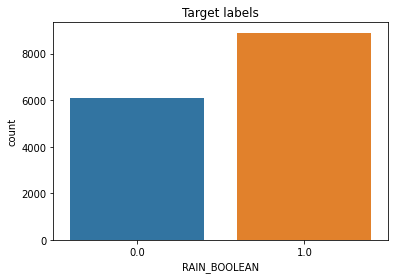

In [13]:
target_Arr = np.array([int(i) for i in read_data["RAIN_BOOLEAN"]])
print(target_Arr)
print(len(target_Arr))
count = 0
for i in target_Arr:
    if i == 0:
        count+=1
print("0 : ",count)
print("1 : ",len(target_Arr)-count)
sns.countplot(read_data.RAIN_BOOLEAN)
plt.title("Target labels")
plt.show()

Removing column RAIN_MM, DATE, RAIN_BOOLEAN for ease, Since we are not going to make use of them further for training.

In [14]:
read_data = read_data.drop(columns = ["RAIN_MM","DATE","RAIN_BOOLEAN"])
read_data

,MAX_AIR_TEMP,MIN_AIR_TEMP,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
13814,12.0,4.5,8.8,16.0,280.0,22.0,4.2,0.7,0.9
13815,11.0,4.0,8.2,12.0,240.0,17.0,0.4,0.6,0.8
13816,15.7,8.8,14.3,24.0,210.0,36.0,0.6,0.8,1.0
13817,12.6,7.1,13.5,24.0,250.0,37.0,6.7,1.0,1.2
13818,11.4,5.5,12.5,19.0,240.0,27.0,7.0,1.2,1.5
...,...,...,...,...,...,...,...,...,...
28819,7.5,1.3,5.5,10.0,270.0,14.0,0.0,0.2,0.3
28820,7.9,-1.2,3.0,7.0,140.0,12.0,4.7,0.1,0.2
28821,10.2,0.6,6.3,11.0,80.0,15.0,0.6,0.3,0.4
28822,10.8,1.9,4.4,10.0,280.0,14.0,1.9,0.2,0.3


# Normalizing training Dataset to fit into the model.

In [15]:
# max_air_temp = np.array(read_data["MAX_AIR_TEMP"])
# min_air_temp = np.array(read_data["MIN_AIR_TEMP"])
# mean_windspeed_knot = np.array(read_data["MEAN_WINDSPEED_KNOT"])
# highest_10min_windspeed = np.array(read_data["HIGHEST_10MIN_WINDSPEED"])
# wind_dir_degree = np.array(read_data["WIND_DIR_DEGREE"])
# highest_gust = np.array(read_data["HIGHEST_GUST"])
# sun_duration = np.array(read_data["SUN_DURATION"])
# evaporation = np.array(read_data["EVAPORATION"])
# potential_evapotranspiration = np.array(read_data["POTENTIAL_EVAPOTRANSPIRATION"])

# training_data = np.column_stack((max_air_temp,min_air_temp,mean_windspeed_knot,
#                                  highest_10min_windspeed,wind_dir_degree,
#                                  highest_gust,sun_duration,
#                                  evaporation, potential_evapotranspiration))
# norm_training_data = preprocessing.normalize(training_data)
# print(norm_training_data)
# names_features = ["MAX_AIR_TEMP","MIN_AIR_TEMP","MEAN_WINDSPEED_KNOT",
#                   "HIGHEST_10MIN_WINDSPEED","WIND_DIR_DEGREE","HIGHEST_GUST",
#                   "SUN_DURATION","EVAPORATION","POTENTIAL_EVAPOTRANSPIRATION"]
# read_data = pd.DataFrame(norm_training_data,names = names_features)

read_data=(read_data-read_data.min())/(read_data.max()-read_data.min())
norm_training_data = read_data.values
read_data

,MAX_AIR_TEMP,MIN_AIR_TEMP,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
13814,0.500000,0.545752,0.239316,0.264151,0.777778,0.246753,0.264151,0.122807,0.111111
13815,0.470060,0.529412,0.222222,0.188679,0.666667,0.181818,0.025157,0.105263,0.098765
13816,0.610778,0.686275,0.396011,0.415094,0.583333,0.428571,0.037736,0.140351,0.123457
13817,0.517964,0.630719,0.373219,0.415094,0.694444,0.441558,0.421384,0.175439,0.148148
13818,0.482036,0.578431,0.344729,0.320755,0.666667,0.311688,0.440252,0.210526,0.185185
...,...,...,...,...,...,...,...,...,...
28819,0.365269,0.441176,0.145299,0.150943,0.750000,0.142857,0.000000,0.035088,0.037037
28820,0.377246,0.359477,0.074074,0.094340,0.388889,0.116883,0.295597,0.017544,0.024691
28821,0.446108,0.418301,0.168091,0.169811,0.222222,0.155844,0.037736,0.052632,0.049383
28822,0.464072,0.460784,0.113960,0.150943,0.777778,0.142857,0.119497,0.035088,0.037037


# Selecting feature columns based upon P-values.

In [16]:
column_names = list(read_data.columns)
p_value_max = 1
while (len(column_names)>0):
    p_values= []
    training_with_ColumnValues_1 = read_data[column_names]
    training_with_ColumnValues_1 = sm.add_constant(training_with_ColumnValues_1)
    model = sm.OLS(target_Arr,training_with_ColumnValues_1.astype(float)).fit()
    p_values = pd.Series(model.pvalues.values[1:],index = column_names)      
    p_value_max = max(p_values)
    feature_with_p_max = p_values.idxmax()
    if(p_value_max>0.05):
        column_names.remove(feature_with_p_max)
    else:
        break
final_features = column_names
print("CHOSEN FEATURES : ", final_features)
print(len(final_features))

CHOSEN FEATURES :  ['MAX_AIR_TEMP', 'MIN_AIR_TEMP', 'MEAN_WINDSPEED_KNOT', 'HIGHEST_10MIN_WINDSPEED', 'WIND_DIR_DEGREE', 'HIGHEST_GUST', 'SUN_DURATION', 'POTENTIAL_EVAPOTRANSPIRATION', 'EVAPORATION']
9


In [17]:
# read_data = read_data.drop(columns = ["RAIN_MM","DATE","RAIN_BOOLEAN"])
# read_data

# Selecting feature columns based upon box plot.

Box plot was plotted with RAIN_BOOLEAN column against all othe feature column.

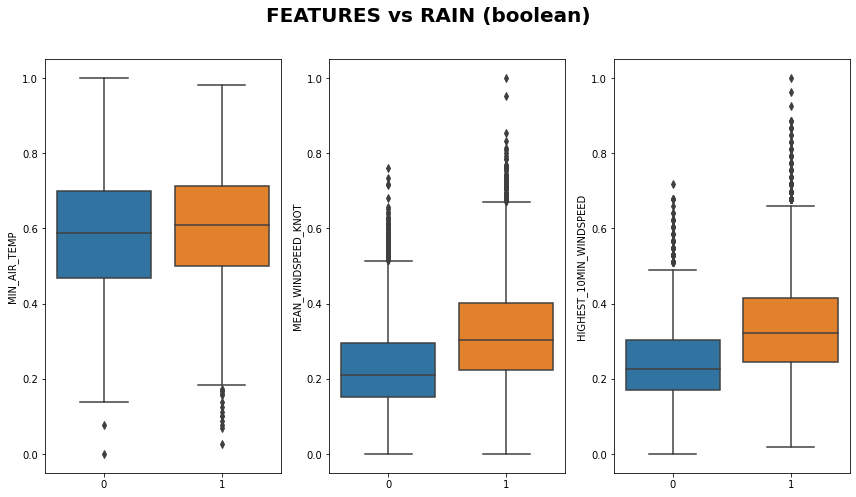

In [18]:
fig = plt.figure(figsize=(12, 7))
plt.xticks(rotation='vertical', fontsize='20')
fig.suptitle('FEATURES vs RAIN (boolean)\n',fontweight ="bold", fontsize='20')

plt.subplot(131)
sns.boxplot(x=target_Arr, y=read_data.MIN_AIR_TEMP)
plt.subplot(132)
sns.boxplot(x=target_Arr, y=read_data.MEAN_WINDSPEED_KNOT)
plt.subplot(133)
sns.boxplot(x=target_Arr, y=read_data.HIGHEST_10MIN_WINDSPEED)
plt.tight_layout()

plt.tight_layout()
plt.show()

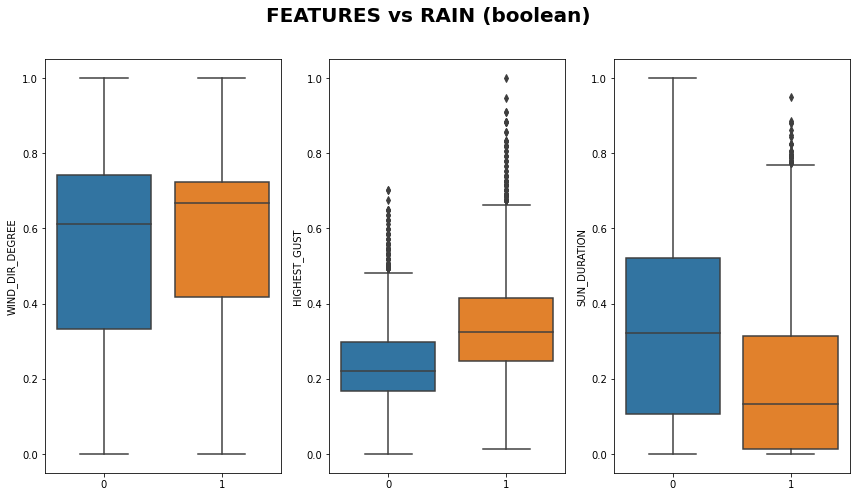

In [19]:
fig = plt.figure(figsize=(12, 7))
plt.xticks(rotation='vertical', fontsize='20')
fig.suptitle('FEATURES vs RAIN (boolean)\n',fontweight ="bold", fontsize='20')

plt.subplot(131)
sns.boxplot(x=target_Arr, y=read_data.WIND_DIR_DEGREE)
plt.subplot(132)
sns.boxplot(x=target_Arr, y=read_data.HIGHEST_GUST)
plt.subplot(133)
sns.boxplot(x=target_Arr, y=read_data.SUN_DURATION)
plt.tight_layout()
plt.show()

# Removing columns from the read_data_train based on box plot.

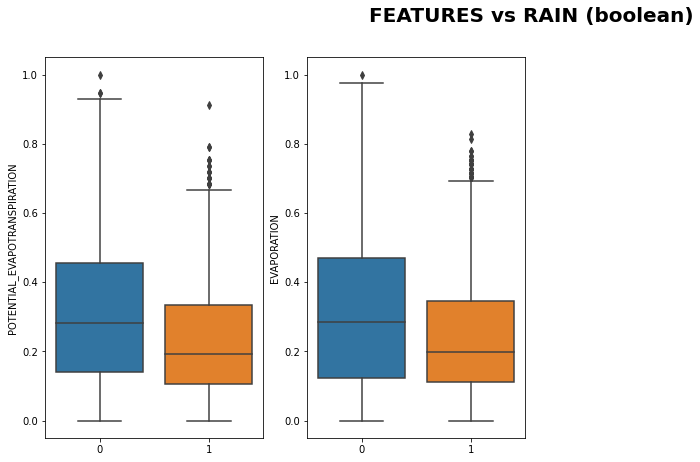

In [20]:
fig = plt.figure(figsize=(18, 7))
plt.xticks(rotation='vertical', fontsize='20')
fig.suptitle('FEATURES vs RAIN (boolean)\n',fontweight ="bold", fontsize='20')
plt.subplot(141)
sns.boxplot(x=target_Arr, y=read_data.POTENTIAL_EVAPOTRANSPIRATION)
plt.subplot(142)
sns.boxplot(x=target_Arr, y=read_data.EVAPORATION)

plt.show()

In [21]:
read_data = read_data.drop(columns = ["MIN_AIR_TEMP","MAX_AIR_TEMP","POTENTIAL_EVAPOTRANSPIRATION"])

# Implementation of various machine learning models.

### Baseline Model (predicts class with target value 0 everytime)

In [22]:
target_Arr_baseline = deepcopy(target_Arr)
print(target_Arr)
print(target_Arr_baseline)
for j in range(len(target_Arr_baseline)):
    if target_Arr_baseline[j] == 1:
        target_Arr_baseline[j] = 0
logisticRegression_accuracy_baseline = metrics.accuracy_score(target_Arr,target_Arr_baseline)
print("BASELINE MODEL ACCURACY : ",logisticRegression_accuracy_baseline)

[1 1 1 ... 0 0 1]
[1 1 1 ... 0 0 1]
BASELINE MODEL ACCURACY :  0.4073284477015323


# Logistic Regression Model using Cross-validation.

max_iter Value : 50
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=50 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.74290473017988
MEAN OF THE F1-SCORES : 0.7876615120854602
STANDARD DEVIATION OF F1-SCORE : 0.0034931529902488506 

max_iter Value : 100
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=100 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7428381079280479
MEAN OF THE F1-SCORES : 0.7877996336324214
STANDARD DEVIATION OF F1-SCORE : 0.0032634910507043334 

max_iter Value : 150
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=150 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7429713524317121
MEAN OF THE F1-SCORES : 0.787800400974349
STANDARD DEVIATION OF F1-SCORE : 0.00360638583310213 

max_iter Value : 200
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=200 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.74290473017988
MEAN OF THE F1-SCORES : 0.787800400974349
STANDARD DEVIATION OF F1-SCORE : 0.00360638583310213 

max_iter Value : 250
LOGISTIC REGRESSION MEAN AC

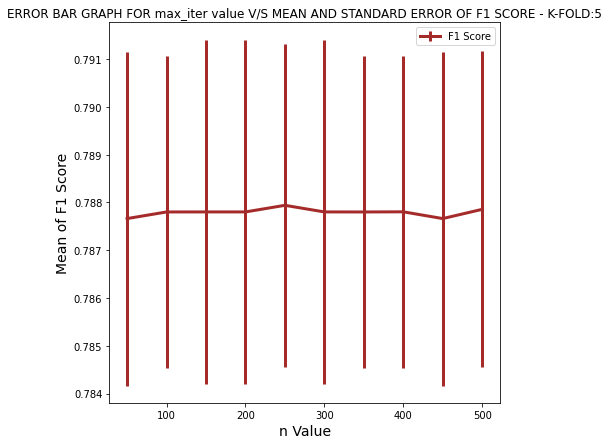

In [23]:
warnings.filterwarnings("ignore")

max_iter_Arr = [50,100,150,200,250,300,350,400,450,500]
f1_score=[]
std_error=[]
mean_accuracy = []
for max_iter_Val in max_iter_Arr:
    kfold_n = 5
    kfold = KFold(n_splits=kfold_n)
    logisticReg = LogisticRegression(penalty="l1",max_iter = 100, solver = "liblinear") #max_iter alteration for different values
    temp=[]
    temp_acc = []
    for train, test in kfold.split(norm_training_data):
        logisticReg.fit(norm_training_data[train], target_Arr[train])
        ypred = logisticReg.predict(norm_training_data[test])
        temp_acc.append(accuracy_score(target_Arr[test],ypred))
        ypred = logisticReg.predict(norm_training_data)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(logisticReg,norm_training_data[train],target_Arr[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("max_iter Value :",max_iter_Val)
    print("LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%max_iter_Val,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")
plt.figure(figsize=(7,7))
plt.errorbar(max_iter_Arr,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('n Value', fontsize = 14)
plt.ylabel('Mean of F1 Score', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR max_iter value V/S MEAN AND STANDARD ERROR OF F1 SCORE - K-FOLD:%s"%str(kfold_n))
plt.legend(["F1 Score"], bbox_to_anchor=(1, 1))
plt.show()

In [24]:
logisticReg = LogisticRegression(penalty="l1",max_iter = 200, solver = "liblinear") #max_iter alteration for different values
logisticReg.fit(norm_training_data, target_Arr)
y_pred = logisticReg.predict(norm_training_data)
intercept_value = logisticReg.intercept_
# theta1 = logisticReg.coef_[0,0]
# theta2 = logisticReg.coef_[0,1]
print("INTERCEPT VALUE :", intercept_value[0])
# print("theta1 :", theta1)
# print("theta2 :", theta2)
# print("theta values: "+ str(logisticReg.coef_))


logisticRegression_accuracy = metrics.accuracy_score(target_Arr,y_pred)
print(logisticRegression_accuracy)

INTERCEPT VALUE : -2.9102903263226976
0.7449700199866756


max_iter Value : 50
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=50 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7429713524317121
MEAN SQUARE ERROR(MSE) VALUES : [0.27181878747501664, 0.2681545636242505, 0.2554963357761492, 0.25116588940706197, 0.2385076615589607]
MEAN OF THE MSEs : 0.2570286475682878
STANDARD DEVIATION OF THE MSEs : 0.012018993984422981 

max_iter Value : 100
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=100 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.74290473017988
MEAN SQUARE ERROR(MSE) VALUES : [0.2721518987341772, 0.2681545636242505, 0.2554963357761492, 0.25116588940706197, 0.2385076615589607]
MEAN OF THE MSEs : 0.25709526982011993
STANDARD DEVIATION OF THE MSEs : 0.012101432780722668 

max_iter Value : 150
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=150 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.74290473017988
MEAN SQUARE ERROR(MSE) VALUES : [0.2721518987341772, 0.2681545636242505, 0.2554963357761492, 0.25116588940706197, 0.238507661

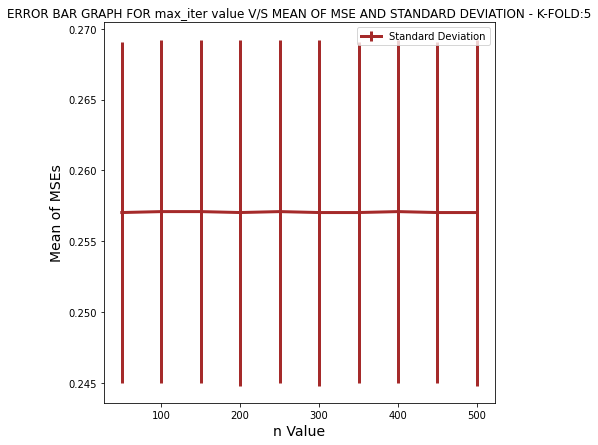

In [25]:
warnings.filterwarnings("ignore")

max_iter_Arr = [50,100,150,200,250,300,350,400,450,500]
mean_error=[]
std_error=[]
mean_accuracy = []
for max_iter_Val in max_iter_Arr:
    kfold_n = 5
    kfold = KFold(n_splits=kfold_n)
    logisticReg = LogisticRegression(penalty="l1",max_iter = 100, solver = "liblinear") #max_iter alteration for different values
    temp=[]
    temp_acc = []
    for train, test in kfold.split(norm_training_data):
        logisticReg.fit(norm_training_data[train], target_Arr[train])
        ypred = logisticReg.predict(norm_training_data[test])
        temp.append(mean_squared_error(target_Arr[test],ypred))
        temp_acc.append(accuracy_score(target_Arr[test],ypred))
        ypred = logisticReg.predict(norm_training_data)
    mean_accuracy.append(np.array(temp_acc).mean()) 
    mean_error.append(np.array(temp).mean())
    std_error.append((np.array(temp).std()))
    print("max_iter Value :",max_iter_Val)
    print("LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%max_iter_Val,mean_accuracy[-1])
    print("MEAN SQUARE ERROR(MSE) VALUES :", temp)
    print("MEAN OF THE MSEs :",mean_error[-1])
    print("STANDARD DEVIATION OF THE MSEs :",std_error[-1],"\n")
plt.figure(figsize=(7,7))
plt.errorbar(max_iter_Arr,mean_error,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('n Value', fontsize = 14)
plt.ylabel('Mean of MSEs', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR max_iter value V/S MEAN OF MSE AND STANDARD DEVIATION - K-FOLD:%s"%str(kfold_n))
plt.legend(["Standard Deviation"], bbox_to_anchor=(1, 1))
plt.show()

# SVM Model using Cross-validation.

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(norm_training_data, target_Arr, test_size=0.2)

In [27]:
# #Create a svm Classifier
# classifier = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# classifier.fit(X_train, y_train)

# #Predict the response for test dataset
# y_Pred = classifier.predict(X_test)

C Value : 0.001
SVM MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.5926715522984678
MEAN OF THE F1-SCORES : 0.7442614239276153
STANDARD DEVIATION OF F1-SCORE : 0.00012045423417669764 

C Value : 0.01
SVM MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7224516988674218
MEAN OF THE F1-SCORES : 0.7925429213857318
STANDARD DEVIATION OF F1-SCORE : 0.0052481186898929826 

C Value : 0.1
SVM MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7361092604930046
MEAN OF THE F1-SCORES : 0.7938530278673541
STANDARD DEVIATION OF F1-SCORE : 0.0035645501172508203 

C Value : 1
SVM MODEL MEAN ACCURACY FOR C Value=1 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7477681545636243
MEAN OF THE F1-SCORES : 0.7974711429437719
STANDARD DEVIATION OF F1-SCORE : 0.003939355569889815 

C Value : 10
SVM MODEL MEAN ACCURACY FOR C Value=10 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.75696202531

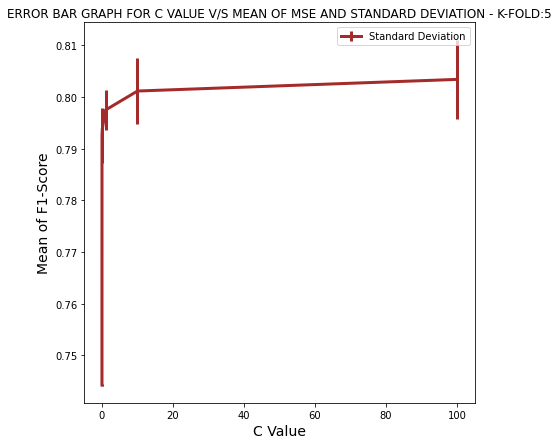

In [28]:
warnings.filterwarnings("ignore")
C_array = [0.001,0.01,0.1,1,10,100]
f1_score=[]
std_error=[]
mean_accuracy = []
for C_value in C_array:
    kfold_n = 5
    kfold = KFold(n_splits=kfold_n)
    svmModel = svm.SVC(C = C_value, kernel = "rbf")
    temp=[]
    temp_acc = []
    for train, test in kfold.split(norm_training_data):
        svmModel.fit(norm_training_data[train], target_Arr[train])
        ypred = svmModel.predict(norm_training_data[test])
        temp_acc.append(accuracy_score(target_Arr[test],ypred))
        ypred = svmModel.predict(norm_training_data)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(svmModel,norm_training_data[train],target_Arr[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("C Value :",C_value)
    print("SVM MODEL MEAN ACCURACY FOR C Value=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%C_value,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")
plt.figure(figsize=(7,7))
plt.errorbar(C_array,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('C Value', fontsize = 14)
plt.ylabel('Mean of F1-Score', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR C VALUE V/S MEAN OF MSE AND STANDARD DEVIATION - K-FOLD:%s"%str(kfold_n))
plt.legend(["Standard Deviation"], bbox_to_anchor=(1, 1))
plt.show()

In [29]:
#Chosen model with best suited C value.
C_value = 10
svmModel = svm.SVC(C = C_value, kernel = "rbf")
svmModel.fit(norm_training_data,target_Arr)
print("\n-------------------------------\nSVM MODEL TRAINED FOR C=%s.\n-------------------------------"%str(C_value))
SVMintercept_value = svmModel.intercept_
#     SVMtheta1 = svmModel.coef_[0,0]
#     SVMtheta2 = svmModel.coef_[0,1]
print("INTERCEPT VALUE :", SVMintercept_value[0])
#     print("theta1 :", SVMtheta1)
#     print("theta2 :", SVMtheta2)
print("MODEL SCORE FOR C=%s :"%str(C_value),svmModel.score(norm_training_data,target_Arr))
y_pred_SVM = svmModel.predict(norm_training_data)



-------------------------------
SVM MODEL TRAINED FOR C=10.
-------------------------------
INTERCEPT VALUE : -0.09644440938701315
MODEL SCORE FOR C=10 : 0.766688874083944


In [30]:
# print("The Intercept Value: " + str(classifier.intercept_))
# print("The Theta values: " + str(classifier.coef_))

In [31]:
# Model Accuracy: How well the model predicts over the training data?
print("Accuracy: ", metrics.accuracy_score(target_Arr, y_pred_SVM))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(target_Arr, y_pred_SVM))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(target_Arr, y_pred_SVM))

Accuracy:  0.766688874083944
Precision:  0.7712733856366928
Recall:  0.8619604316546763


# kNN model using cross validation.

n Value : 1
kNN MODEL MEAN ACCURACY FOR n VALUE=1 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.6620919387075282
MEAN OF THE F1-SCORES : 0.7146151639553239
STANDARD DEVIATION OF F1-SCORE : 0.010127846043892889 

n Value : 2
kNN MODEL MEAN ACCURACY FOR n VALUE=2 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.6371752165223185
MEAN OF THE F1-SCORES : 0.6431527234491174
STANDARD DEVIATION OF F1-SCORE : 0.012264364963976001 

n Value : 3
kNN MODEL MEAN ACCURACY FOR n VALUE=3 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.6930712858094603
MEAN OF THE F1-SCORES : 0.7458244815673638
STANDARD DEVIATION OF F1-SCORE : 0.009040838546278258 

n Value : 4
kNN MODEL MEAN ACCURACY FOR n VALUE=4 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.6858094603597602
MEAN OF THE F1-SCORES : 0.7137980750415748
STANDARD DEVIATION OF F1-SCORE : 0.009868606050517969 

n Value : 5
kNN MODEL MEAN ACCURACY FOR n VALUE=5 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7061292471685543
MEAN OF T

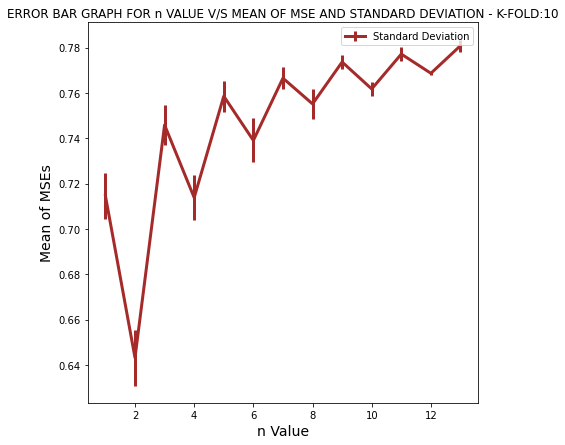

In [32]:
neigh_arr = [1,2,3,4,5,6,7,8,9,10,11,12,13]
f1_score=[]
std_error=[]
mean_accuracy = []
for neigh_size in neigh_arr:
    kfold_n = 10
    kfold = KFold(n_splits=kfold_n)
    model = KNeighborsClassifier(n_neighbors=neigh_size)
    temp=[]
    temp_acc = []
    for train, test in kfold.split(norm_training_data):
        model.fit(norm_training_data[train], target_Arr[train])
        ypred = model.predict(norm_training_data[test])
        temp_acc.append(accuracy_score(target_Arr[test],ypred))
        ypred = model.predict(norm_training_data)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(model,norm_training_data[train],target_Arr[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("n Value :",neigh_size)
    print("kNN MODEL MEAN ACCURACY FOR n VALUE=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%neigh_size,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")

plt.figure(figsize=(7,7))
plt.errorbar(neigh_arr,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('n Value', fontsize = 14)
plt.ylabel('Mean of MSEs', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR n VALUE V/S MEAN OF MSE AND STANDARD DEVIATION - K-FOLD:%s"%str(kfold_n))
plt.legend(["Standard Deviation"], bbox_to_anchor=(1, 1))
plt.show()

In [33]:
kNN_Model = KNeighborsClassifier(n_neighbors=7)
kNN_Model.fit(norm_training_data, target_Arr)
print("-----------------------------\nkNN CLASSIFIER MODEL TRAINED.\n-----------------------------")
y_pred = kNN_Model.predict(norm_training_data)
kNN_accuracy = accuracy_score(target_Arr,y_pred)
print("kNN MODEL ACCURACY : ",kNN_accuracy)

-----------------------------
kNN CLASSIFIER MODEL TRAINED.
-----------------------------
kNN MODEL ACCURACY :  0.7811459027315123


# Neural Network Model using Keras.

In [34]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(9,)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1(0.0001)))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(norm_training_data,target_Arr,epochs=10, batch_size=64, validation_split=0.2)

y_pred = model.predict_classes(norm_training_data)
NN_accuracy = accuracy_score(target_Arr,y_pred)
print("NEURAL NETWORK MODEL ACCURACY : ",NN_accuracy)

Epoch 1/10
188/188 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6232 - val_loss: 0.6064 - val_accuracy: 0.7069
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.6861 - val_loss: 0.5521 - val_accuracy: 0.7252
Epoch 3/10
188/188 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 0.7053 - val_loss: 0.5396 - val_accuracy: 0.7375
Epoch 4/10
188/188 [==============================] - 0s 1ms/step - loss: 0.5615 - accuracy: 0.7135 - val_loss: 0.5345 - val_accuracy: 0.7425
Epoch 5/10
188/188 [==============================] - 0s 1ms/step - loss: 0.5570 - accuracy: 0.7209 - val_loss: 0.5302 - val_accuracy: 0.7432
Epoch 6/10
188/188 [==============================] - 0s 1ms/step - loss: 0.5509 - accuracy: 0.7242 - val_loss: 0.5328 - val_accuracy: 0.7395
Epoch 7/10
188/188 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.7249 - val_loss: 0.5241 - val_accuracy: 0.7452
Epoch 

In [35]:
#read_data.to_excel("data_rough.xlsx")
#print("XLSX format file written for observation.")